#### Import the libaries

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



### Data Preprocessing and Exploration

### Load the dataset

The dataset was reduced to 150,000 from 284807 entries as it was more than 100mb in size

In [6]:
file_path = 'creditcard.csv'

credit_card_transactions = pd.read_csv('creditcard.csv')

# Create a random sample of 150000 entries without replacement
credit_card_transactions = credit_card_transactions.sample(n=150000, random_state=1)

# Save the sampled dataframe to a new CSV file
credit_card_transactions_path = 'creditcard2.csv'

credit_card_transactions.to_csv(credit_card_transactions_path, index=False)

credit_card_transactions


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52315,45383.0,0.836624,-2.519582,1.196466,-0.991892,-2.611443,0.558372,-1.744834,0.289482,-0.817544,...,0.195054,0.481112,-0.344394,0.037259,0.187912,-0.002671,0.041413,0.073241,305.90,0
11921,20553.0,-0.574896,0.074764,0.930075,-1.753942,1.950322,3.699407,-0.766975,0.992184,2.106239,...,-0.130443,-0.125800,-0.283384,0.965771,0.436652,-0.529999,0.126471,0.085025,11.85,0
267112,162616.0,-0.488902,1.028562,0.198167,-0.970818,0.884871,-1.092428,1.193760,-0.087091,-0.427268,...,0.322079,0.882335,-0.423805,-0.085888,0.237598,-0.224670,0.103182,0.148677,15.00,0
161419,114167.0,2.126715,0.633287,-3.683904,0.313641,1.727044,-1.250624,1.017300,-0.411531,-0.060271,...,0.179764,0.695786,-0.311114,0.043717,0.950159,-0.213111,-0.035520,-0.039317,1.00,0


Explore the data

In [7]:
print(credit_card_transactions.head())
print(credit_card_transactions.info())
print(credit_card_transactions['Class'].value_counts())

            Time        V1        V2        V3        V4        V5        V6  \
169876  119907.0 -0.611712 -0.769705 -0.149759 -0.224877  2.028577 -2.019887   
127467   78340.0 -0.814682  1.319219  1.329415  0.027273 -0.284871 -0.653985   
137900   82382.0 -0.318193  1.118618  0.969864 -0.127052  0.569563 -0.532484   
21513    31717.0 -1.328271  1.018378  1.775426 -1.574193 -0.117696 -0.457733   
134700   80923.0  1.276712  0.617120 -0.578014  0.879173  0.061706 -1.472002   

              V7        V8        V9  ...       V21       V22       V23  \
169876  0.292491 -0.523020  0.358468  ... -0.075208  0.045536  0.380739   
127467  0.321552  0.435975 -0.704298  ... -0.128619 -0.368565  0.090660   
137900  0.706252 -0.064966 -0.463271  ... -0.305402 -0.774704 -0.123884   
21513   0.681867 -0.031641  0.383872  ... -0.220815 -0.419013 -0.239197   
134700  0.373692 -0.287204 -0.084482  ... -0.160161 -0.430404 -0.076738   

             V24       V25       V26       V27       V28  Amount  Cl

The dataset consists of transactions made by credit cards, where each transaction is represented by numerical input variables. These variables include the transaction amount, the time of the transactions and the class of the transactions.

### Data Preprocessing

Check for missing values and summarize the statistics of the dataset. We also need to understand the distribution of the "Class" to see how imbalanced the dataset is

In [8]:
# Checking for missing values
missing_values = credit_card_transactions.isnull().sum()
missing_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Summary statistics of the dataset
credit_card_transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,94612.954967,0.005412,0.003061,0.004748,0.003318,0.000975,-0.003985,-0.002025,0.000338,0.002306,...,0.000727,-0.000014,-0.000403,-0.000498,0.000005,0.001563,-0.000272,-0.000808,87.889514,0.001607
std,47509.330677,1.940477,1.647367,1.500891,1.413252,1.366155,1.321917,1.208531,1.172686,1.094425,...,0.728354,0.724713,0.622951,0.604657,0.520718,0.482084,0.395989,0.320998,249.369384,0.040051
min,0.000000,-56.407510,-72.715728,-33.680984,-5.560118,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,...,-22.665685,-10.933144,-36.666000,-2.836627,-7.495741,-2.604551,-9.895244,-9.617915,0.000000,0.000000
25%,54074.000000,-0.917749,-0.597664,-0.881872,-0.844789,-0.692657,-0.767630,-0.555587,-0.207859,-0.640494,...,-0.228614,-0.541936,-0.161933,-0.354746,-0.317197,-0.326250,-0.070671,-0.052810,5.600000,0.000000
50%,84545.500000,0.021578,0.066869,0.182385,-0.016363,-0.055851,-0.274157,0.039172,0.023185,-0.048759,...,-0.029450,0.006675,-0.011514,0.040871,0.016165,-0.050690,0.001369,0.011163,22.000000,0.000000
75%,139203.000000,1.315404,0.808143,1.028302,0.747023,0.610793,0.395349,0.568182,0.326804,0.600858,...,0.185639,0.528463,0.147405,0.437844,0.350446,0.242541,0.090491,0.077913,77.082500,0.000000
max,172784.000000,2.454930,21.467203,4.079168,16.875344,34.801666,23.917837,44.054461,19.587773,10.370658,...,27.202839,8.361985,22.528412,4.022866,6.070850,3.220178,12.152401,33.847808,19656.530000,1.000000


In [10]:

# Class distribution
class_distribution = credit_card_transactions['Class'].value_counts()

class_distribution


0    149759
1       241
Name: Class, dtype: int64

The dataset does not contain any missing values.

The 'Time' feature has a wide range, indicating a long duration over which the transactions were collected.
Looking at the min, max and standard deviation values, V1 to V28 don't have a discernible scale which means they are already scaled.
The 'Amount' feature has a significant range, suggesting some transactions are of substantially higher value than others.
The 'Class' feature indicates a highly imbalanced dataset, with 241 fraud cases (Class = 1) out of 149,759 transactions.

#### Normalize Amount feature and drop the 'Time' feature

In [11]:
# Normalize 'Amount' feature
credit_card_transactions['normAmount'] = StandardScaler().fit_transform(credit_card_transactions['Amount'].values.reshape(-1, 1))

# Drop unnecessary features
credit_card_transactions = credit_card_transactions.drop(['Time', 'Amount'], axis=1)

# Splitting the data into features and targets
X = credit_card_transactions.drop('Class', axis=1)  # Features
y = credit_card_transactions['Class']  # Target variable

# Display the first few rows of the new dataset
credit_card_transactions.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
169876,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,0,-0.345270
127467,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,0,-0.344508
137900,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0,-0.348879
21513,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,0,-0.288366
134700,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0,-0.349401


With the normalization of the 'Amount' feature and the dropping 'Time' feature, the data is now in a more suitable form for training our machine learning models to predict the credit card fraud. But first, there is need to address the class imbalance present in the dataset

### Handling Class Imbalance

In [12]:
# Handling class imbalance with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Splitting the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Checking the distribution of the target variable in the original and resampled dataset
original_dist = y.value_counts()
resampled_dist = y_res.value_counts()

original_dist, resampled_dist


(0    149759
 1       241
 Name: Class, dtype: int64,
 0    149759
 1    149759
 Name: Class, dtype: int64)

### Train the Model

In [13]:
# Train the Random Forest model
clf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

### Make predictions on the test set and evaluate the model

In [14]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matrix}")
print(f"Classification Report: \n{class_report}")

Accuracy: 0.9999109686609686
Confusion Matrix: 
[[44919     8]
 [    0 44929]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44927
           1       1.00      1.00      1.00     44929

    accuracy                           1.00     89856
   macro avg       1.00      1.00      1.00     89856
weighted avg       1.00      1.00      1.00     89856



/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


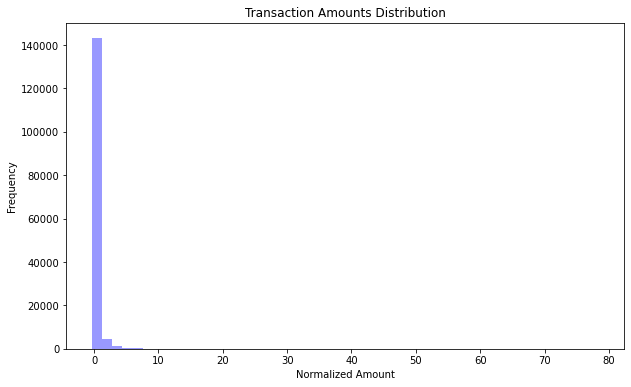

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


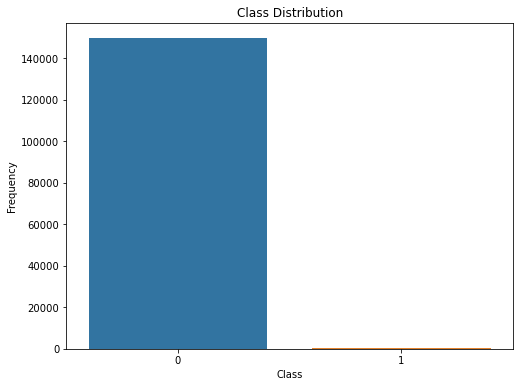

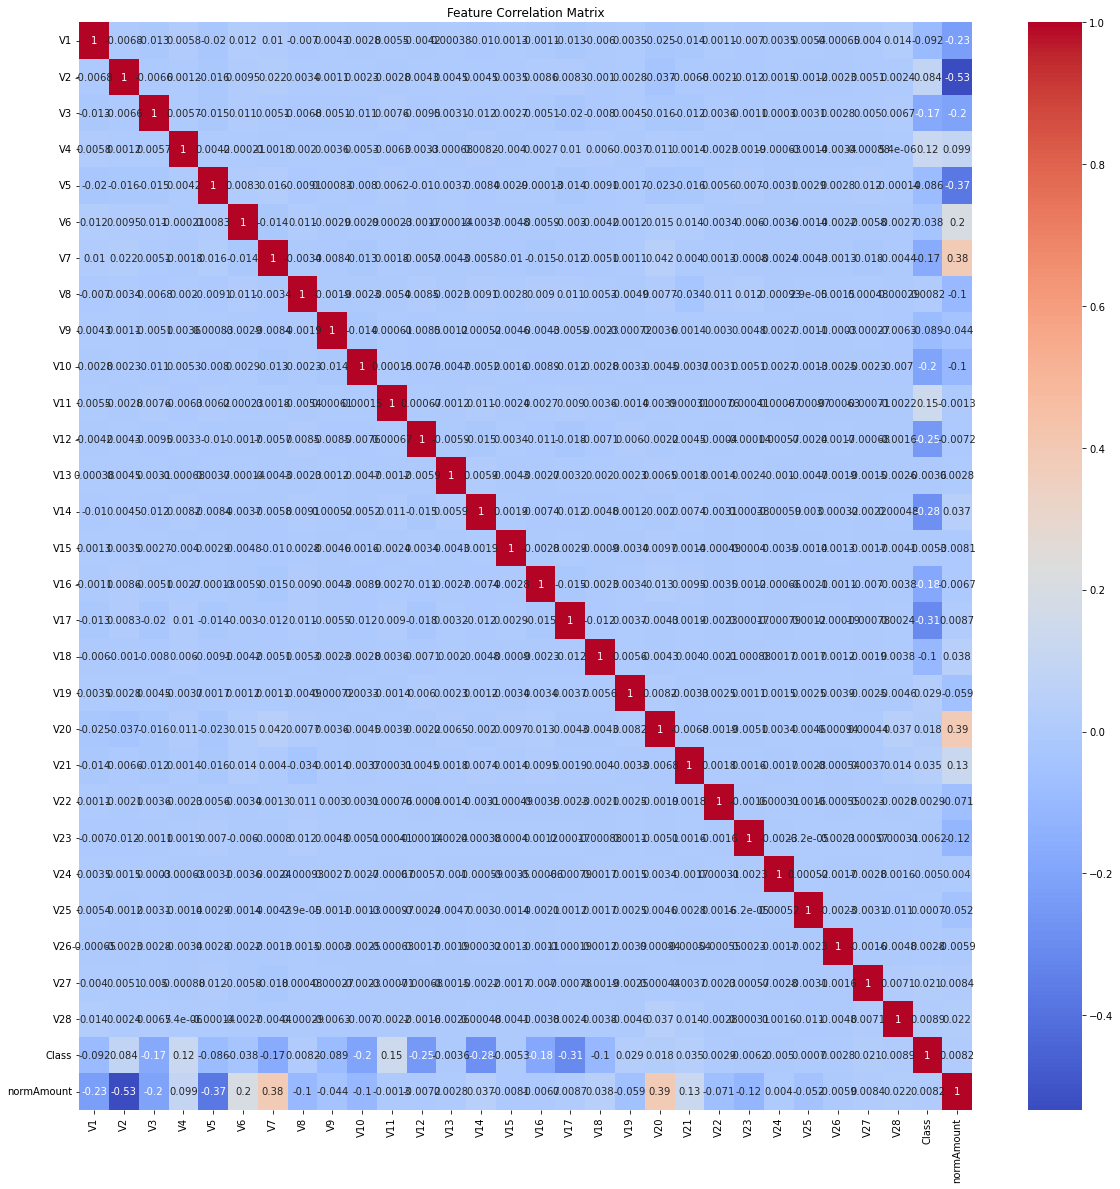

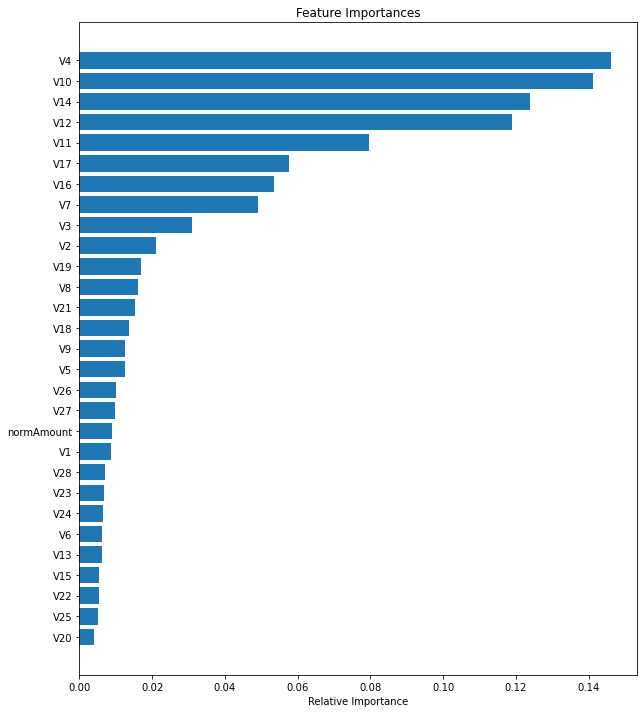

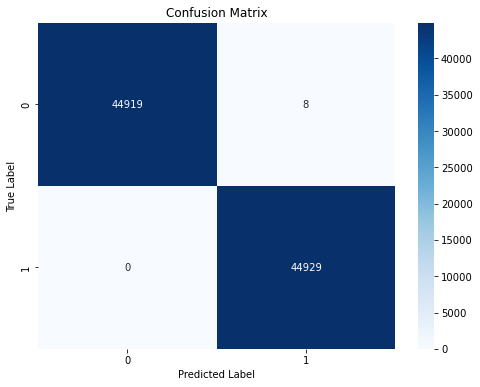

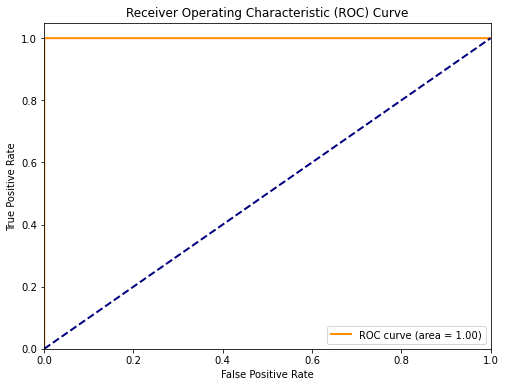

In [15]:
# 1. Histogram for Transaction Amounts
plt.figure(figsize=(10, 6))
sns.distplot(credit_card_transactions['normAmount'], kde=False, bins=50, color='blue')
plt.title('Transaction Amounts Distribution')
plt.xlabel('Normalized Amount')
plt.ylabel('Frequency')
plt.show()

# 2. Class Distribution Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(credit_card_transactions['Class'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# 3. Correlation Matrix Heatmap
corr_matrix = credit_card_transactions.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# 4. Feature Importance Bar Plot (For Random Forest)
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)
plt.figure(figsize=(10, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 5. Confusion Matrix Visualization
conf_matrix_visual = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_visual, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 6. ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


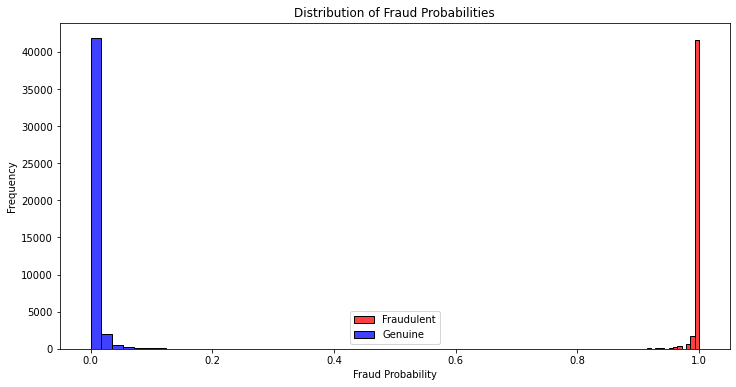

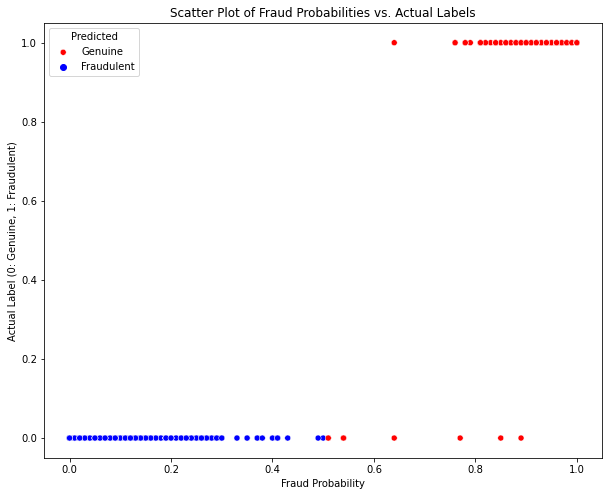

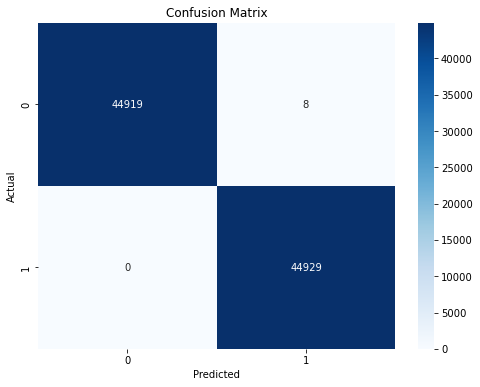

In [16]:
# Predict fraud probabilities on the test set
fraud_probabilities = clf.predict_proba(X_test)[:, 1]

# Define a threshold to classify transactions
threshold = 0.5

# Classify transactions based on the threshold
predicted_labels = (fraud_probabilities > threshold).astype(int)

# Create a DataFrame for the results
results = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_labels, 'Fraud_Probability': fraud_probabilities})

# Visualize the distribution of fraud probabilities
plt.figure(figsize=(12, 6))
sns.histplot(results[results['Actual'] == 1]['Fraud_Probability'], bins=50, color='red', label='Fraudulent')
sns.histplot(results[results['Actual'] == 0]['Fraud_Probability'], bins=50, color='blue', label='Genuine')
plt.xlabel('Fraud Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Fraud Probabilities')
plt.legend()
plt.show()

# Visualize a scatter plot of fraud probabilities vs. actual labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Fraud_Probability', y='Actual', data=results, hue='Predicted', palette={0: 'blue', 1: 'red'})
plt.xlabel('Fraud Probability')
plt.ylabel('Actual Label (0: Genuine, 1: Fraudulent)')
plt.title('Scatter Plot of Fraud Probabilities vs. Actual Labels')
plt.legend(title='Predicted', loc='upper left', labels=['Genuine', 'Fraudulent'])
plt.show()

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
